<a href="https://colab.research.google.com/github/fatin28/PCVK_Genap_2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pylab as plt
import numpy as np

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


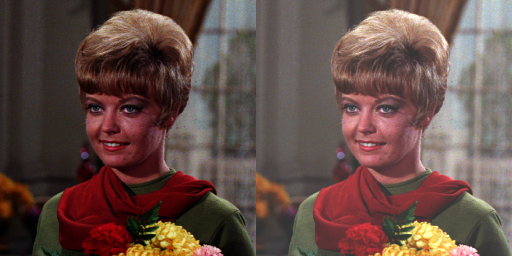

In [5]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
---------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0] : 1.5


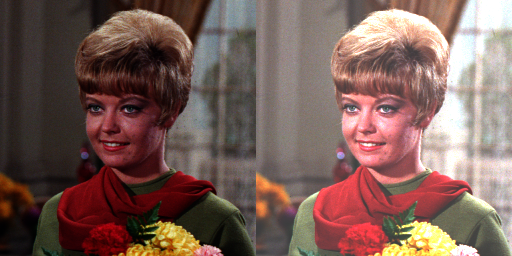

In [6]:
#TUGAS PRAKTIKUM 
#1.Implementasikan transformasi contrast 
print('Mengubah kontras dan tingkat kecerahan citra')
print('---------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contras = float(input('Masukkan kontras [1.0 - 3.0] : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
bc_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      bc_image[y,x,c] = np.clip(contras*original[y,x,c] + brightness, 0, 255)

#simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, bc_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 40


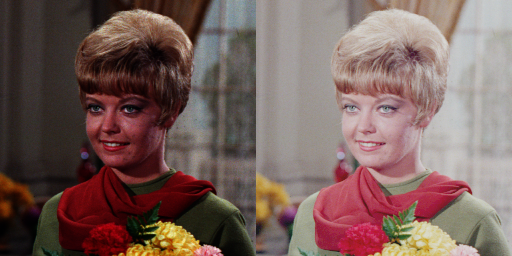

In [7]:
#2.Implementasikan transformasi logarithmic brightness
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
br_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      br_image[y,x,c] = np.clip(brightness*(np.log(1 + original[y,x,c])),0,255)

#simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, br_image))
cv2_imshow(final_frame)

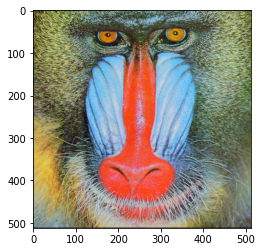

In [26]:
#3.Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance
img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_color)

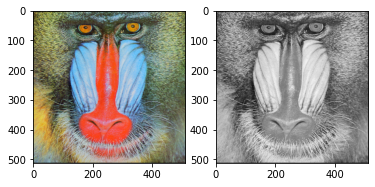

In [31]:
#3A. Averaging
R, G, B = img_color[:,:,0], img_color[:,:,1], img_color[:,:,2]

gray_img = R/3 + G/3 + B/3

f, axarr = plt.subplots(1,2) #membuat 2 plot citra input dan output
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

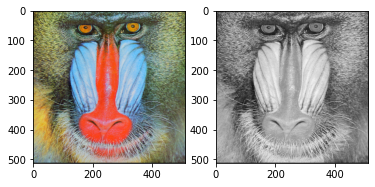

In [30]:
#3B. Lightness
R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,2]
max_channels = np.maximum(np.maximum(R, G), B) #np.max(color_img, axis=2)
min_channels = np.minimum(np.minimum(R, G), B) #np.min(color_img, axis=2)

gray_img = max_channels/2 + min_channels/2

f, axarr = plt.subplots(1,2) #membuat 2 plot citra input dan output
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

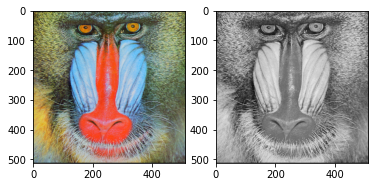

In [29]:
#3C. Luminance
R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,2]

gray_img = (0.21 * R) + (0.72 * G) + (0.07 * B)

f, axarr = plt.subplots(1,2) #membuat 2 plot citra input dan output
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

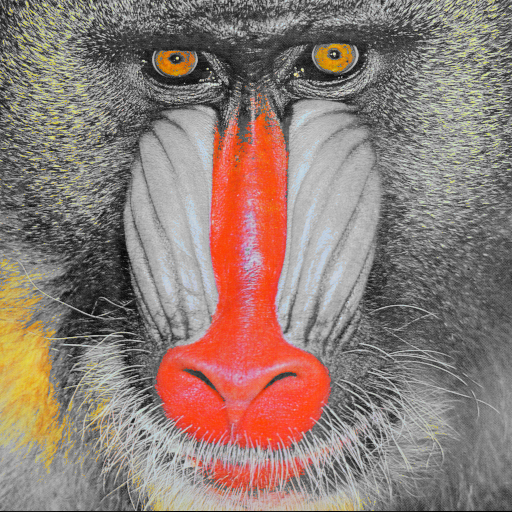

In [35]:
#4. Tampilkan warna tertentu pada citra, dan ubah warna lain menjadi grayscale
img_4 = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
ret, mask = cv.threshold(img_4[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_4, mask3)
gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

hasil = gray + red
cv2_imshow(hasil)